# LIBRERÍAS 

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.patches import Circle

# CAMPOS CONSTANTES

In [2]:
def V_d(q,F,B,B_N):
    """La función toma la carga el campo magnetico, la norma del mismo y la fuerza a la que se somete la partícula
    para calcular la velocidad de deriva debida a esa fuerza"""
    v_d = np.cross(F,B)
    v_d1 = v_d / (q*B_N**2)
    return v_d1 

In [3]:
def F_E(q,E):
    """ Esta función toma la carga de la partícula y el campo electrico para calcular la fuerza eelectrica"""
    fe = np.multiply(E,q)
    return fe

In [4]:
def F_C(RC,RC_N,v_pl,m):
    """ Esta función toma el radio de curvatura, la velocidad paralela a B de la partícula y la masa
    para calcular la deriva de cuvatura"""
    C1 = m*(v_pl**2)/(RC_N**2)
    fc = np.multiply(C1,RC)
    return fc

In [5]:
def Freq(q,B_N , m):
    """La función calcula la frecuencia de girocincrotón para la partícula
    a partir de la carga, la norma del campo magnetico y la masa """
    WC=np.abs(q)*B_N/m
    return WC

In [6]:
def Cycl(RL,t):
    XX = RL*np.sin(wc*t) #Encuentra la proyección
    YY = RL*np.cos(wc*t) #del radio de Larmor con respecto a X y Y
    ZZ = 0 # El giro se encuentra restringido a un plano.
    return XX, YY, ZZ

In [7]:
#Constantes
q = 1.602e-19 #Carga del protón (c)
h = 10e-5 #paso de iempo (s)
t = 0 #Tiempó inicial (s)
tt=2000 #número total de pasos de tiempo
m = 1.673e-27 #masa del protón (kg)
v_pl = 1 # Velocidad paralela a B (m/s)
v_pp = 1 # Velocidad perpendicular a B (m/s)
#Vectores
y = list(range(10))
E=np.array([0,0,0]) #( V/m)
B=np.array([0,0,3.12e-5]) #  (T)
RC = np.array([1e6,6.37e6,2e6]) #( m)
P0 = np.array([1e6,6.37,2e6]) #( m)
#Operaciones
B_N= 3.12e-5 #  (T)
wc = Freq(q,B_N,m)
RC_N = 6.751e6 # (m)
RL= v_pp /wc
#Fuerzas
FE = F_E(q,E)
FC = F_C(RC,RC_N,v_pl,m)
#Respuestas 
print('La frecuencia ciclotrón es', wc)
print('La fuerza electrica es', FE)
print('La fuerza centripeta es', FC)
print(RL)

La frecuencia ciclotrón es 2987.591153616258
La fuerza electrica es [0. 0. 0.]
La fuerza centripeta es [3.67079156e-35 2.33829423e-34 7.34158313e-35]
0.0003347178206728769


In [8]:
v_gi = np.zeros([tt,3]) #Arreglo que contendrá la velocidad del centro guía
P_P= np.zeros([tt,3]) # Arreglo que contendrá la posición de la partícuala
P_gi = np.zeros([tt,3]) # Arreglo que contendra la posición del centro guía
x = np.zeros(tt) #posición del protón en x
y = np.zeros(tt) #posición del protón en y
z = np.zeros(tt) #posición del protón en z
sincro = np.zeros([tt,3]) #Contendrá la posición de la particula respecto al centro guía
T=np.empty(tt)#Arreglo que contendrá al tiempo
v_e = V_d(q,FE,B,B_N) #Velocidad de deriva ExB
v_c = V_d(q,FC,B,B_N) #Velocida de deriva Rc
P_gi[0] = P0

for i in range (0,tt): 
    T[i]=t
    sincro[i] = Cycl(RL,t)
    v_gi[i] = v_e + v_c #La velocidad del cenmtro guía es la suma de las derivas
    P_P[i] = P_gi[i] + sincro[i] #Actualuzación de la posición de las partículas
    x[i] = P_P[i,0]
    y[i] = P_P[i,1]
    z[i] = P_P[i,2]
    if i<tt-1: 
        P_gi[i+1] = P_gi[i] + v_gi[i]*t #r_0 + v*t
        t = t+h

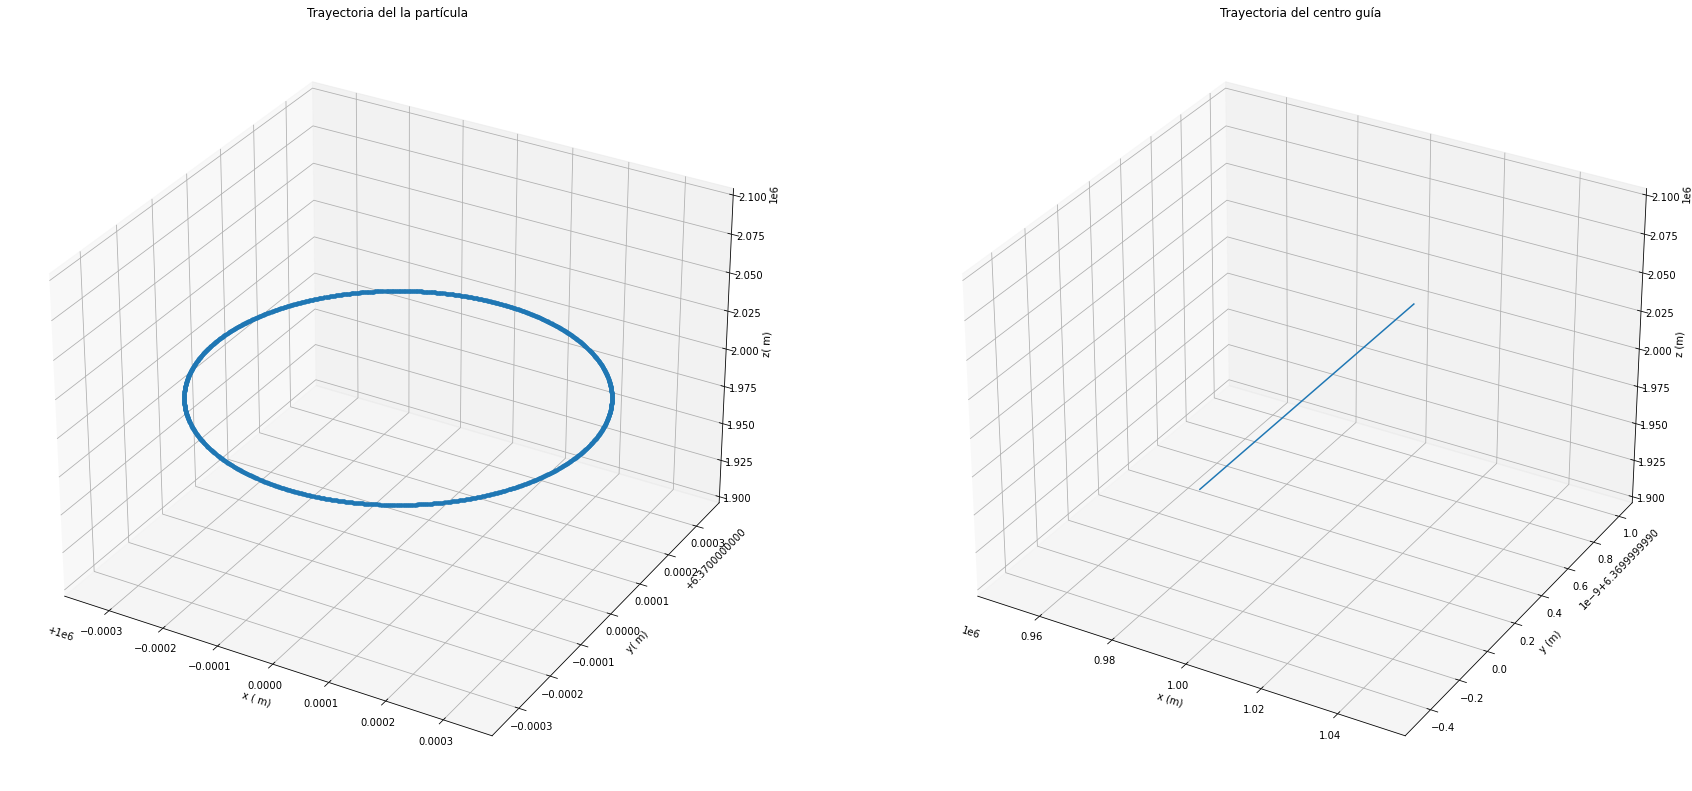

In [9]:
fig = plt.figure(figsize=(30,15))

ax0 = fig.add_subplot(121, projection='3d')
ax0.plot(x, y, z,'.')
ax0.set_xlabel('x ( m)')
ax0.set_ylabel('y( m)')
ax0.set_zlabel('z( m)')
ax0.set_title('Trayectoria del la partícula')

ax1 = fig.add_subplot(122, projection='3d')
ax1.plot(P_gi[:,0], P_gi[:,1], P_gi[:,2])
ax1.set_xlabel('x (m)')
ax1.set_ylabel('y (m)')
ax1.set_zlabel('z (m)')
ax1.set_title('Trayectoria del centro guía')
fig.savefig('CampoCte.png')

# DIPOLO MAGNÉTICO

In [10]:
#Dipolo magnetico, parámetros
#Campo magnetico terreste en el ecuador
B_0 = 3.12e-5
# Radio de la Tierra (m)
R_T = 6.37e6
# Desviaciónentre el polo magnetico y el eje terrestre.
α = np.radians(9.6)

In [11]:
#Norma de B
def Norm_Vec(A):
    A_n = np.sqrt(A[0]**2 + A[1]**2 + A[2]**2)
    return A_n

In [12]:
#Función dipolo
def B_E(r, θ):
    """Regresa el campo magnetico Terrestre en coordenadas cartecianas"""
    fac = B_0 * (R_T / r)**3
    B_r, B_θ = -2 * fac * np.cos(θ + α), -fac * np.sin(θ + α)
    c, s = np.cos(np.pi/2 + θ ), np.sin(np.pi/2 + θ)
    B_y = -B_θ * s + B_r * c
    B_z = B_θ * c + B_r * s  
    B_x = 0
    return B_x,B_y,B_z

In [13]:
#Gradiente de B
def Grad_B(r, θ):
    "Esta función calcula el gradiente de la norma de B"
    fac = B_0*(R_T**3)/r**4
    co = np.sqrt(1+(np.cos(θ + α)))
    Br = -3*fac*co 
    Bθ = -fac*np.sin(2*(θ + α))/(2*co)
    c, s = np.cos(np.pi/2 + θ ), np.sin(np.pi/2 + θ)
    By = -Bθ * s + Br * c
    Bz = Bθ * c + Br * s  
    Bx = 0
    return Bx,By,Bz

In [14]:
#Gradiente de B
def Grad_B(r, θ):
    "Esta función calcula el gradiente de la norma de B"
    fac = B_0*(R_T**3)/r**4
    co = np.sqrt(1+(np.cos(θ + α)))
    Br = -3*fac*co 
    Bθ = -fac*np.sin(2*(θ + α))/(2*co)
    c, s = np.cos(np.pi/2 + θ ), np.sin(np.pi/2 + θ)
    By = -Bθ * s + Br * c
    Bz = Bθ * c + Br * s  
    Bx = 0
    return Bx,By,Bz
  

In [15]:
#Fuerza gradiente de B
def F_GB(gB,v_pp,r_L):
    "Esta función calcula la fuerza debida al gradiente de B"
    q_n = - abs(q)*v_pp*r_L / 2 
    FGB =  np.multiply(gB,q_n)
    return FGB

In [16]:
#Freciencia de Giro
def Gir_F (q,B_n,m):
    ω_c = abs(q)*B_n/m
    return ω_c
  

In [17]:
#Angulo entre Vectores
def A_Vec(A,B,A_n,B_n):
    AdB = np.dot(A,B) 
    if A_n*B_n == 0 :
        return 0
    else:
        AdB = np.dot(A,B)
        cAB = AdB/(A_n*B_n) 
        β = np.radians(np.arccos(cAB))
        return β

In [18]:
#Velocidad respecto a B
def Vel_B(B,B_n,v):
    v_n = Norm_Vec(v)
    β = A_Vec(B,v,B_n,v_n)
    v_pp = v_n*np.sin(β)
    v_pl = v_n*np.cos(β)
    return v_pp,v_pl

In [19]:
#Radio de Larmor
def R_Larmor(v_pp,ω_c):
    r_L = v_pp/ω_c
    return r_L

In [20]:
#Función fuerza
def V_D(q,F,B,B_n):
    """La función toma la cargam el campo magnetico, la norma del mismo y la fuerza a la que se somete la partícula
    para calcular la velocidad de deriva debida a esa fuerza"""
    v_d = np.cross(F,B)
    v_d1 = np.divide(v_d,(q*B_n**2))  
    return v_d1

In [21]:
#Fuerza centripeta
def F_C(r_cu,v_pl,m):
    """ Esta función toma el radio de curvatura, la velocidad paralela a B de la partícula y la masa
    para calcular la deriva de cuvatura"""
    rcu_n=Norm_Vec(r_cu)
    c1 = m*(v_pl**2)/(rcu_n**2)
    fc = np.multiply(c1,r_cu)
    return fc

In [22]:
#Posición alrededor del centro guía
def Cycl(r_L,t):
    X = r_L*np.sin(ω_c*t)
    Y = r_L*np.cos(ω_c*t)
    CYCY = np.array([X,  Y])    
    return(CYCY) 

In [23]:
tt=2000
v_gc = np.zeros([tt,3])#Velocidad del centro guía
p_gc = np.zeros([tt,3])#Posición del centro guía
BA = np.zeros([tt,3])
x = np.zeros(tt)
y = np.zeros(tt)
z = np.zeros(tt)
x_prim = np.zeros(tt) #posiciones en x respecto a la orbita
y_prim = np.zeros(tt) #posiciones respecto a la orbita
sincro = np.zeros([tt,2]) #velocidad de sincroton
T=np.empty(tt)#tiempo
p_gc[0] = np.array([1e6,R_T,2e6]) #Posicion inicial del centro guía
v_gc[0]=[1,1,1]
q=1.602e-19#carga del proton
m=1.637e-27#carga electrón
t = 0 #tiempo inicial
h = 10e-5 #paso de tiempo
hor = np.array([0,1,0])


for i in range (0,tt): 
    T[i]=t
    r = Norm_Vec(p_gc[i])
    θ = A_Vec(p_gc[i],hor,r,1)
    B = B_E(r,θ)
    BA[i] = B
    B_n = Norm_Vec(B)
    gB = Grad_B(r,θ)
    v_B = Vel_B(B,B_n,v_gc[i])
    v_pp = v_B[0]
    v_pl = v_B[1]
    ω_c = Gir_F(q,B_n,m) 
    r_L = R_Larmor(v_pp,ω_c)
    f_gB = F_GB(gB,v_pp,r_L) #Fuerza debida al Grad B
    f_c = F_C(p_gc[i],v_pl,m)
    sincro[i] = Cycl(r_L,t) #Posición respecto al centro huía
    v_gB = V_D(q,f_gB,B,B_n) #deriva grad B
    v_fc = V_D(q,f_c,B,B_n) #Deriva por radiod e curvatura

    x_prim[i] = sincro[i,0]
    y_prim[i] = sincro[i,1]
    x[i] = p_gc[i,0]
    y[i] = p_gc[i,1]
    z[i] = p_gc[i,2]
    if i<tt-1: 
        v_gc[i+1] = v_gc[i] + v_gB+v_fc
        p_gc[i+1] = p_gc[i] + v_gc[i] 
        p_n = Norm_Vec(p_gc[i])
        t = t+h

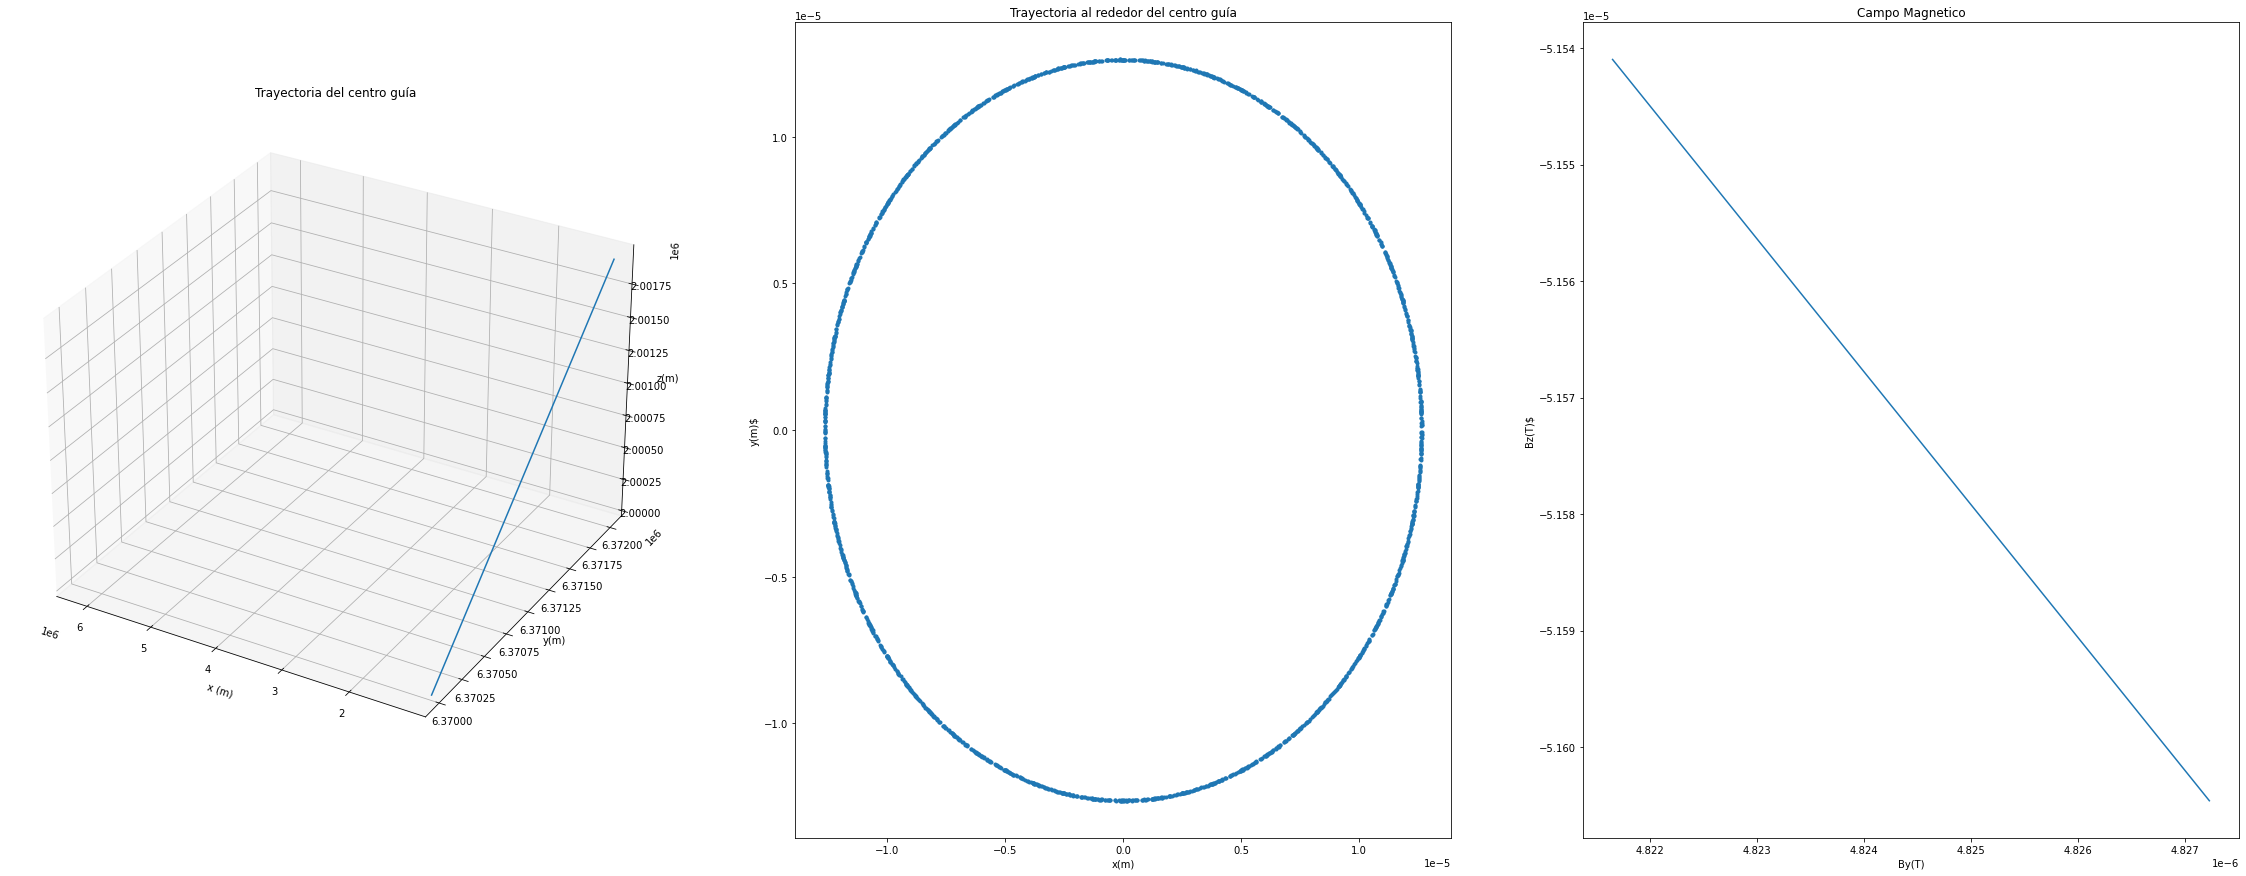

In [24]:
fig = plt.figure(figsize=(40,15))
ax0 = fig.add_subplot(131, projection='3d')
ax0.plot(x, y, z,)
ax0.set_xlabel('x (m)')
ax0.set_ylabel('y(m)')
ax0.set_zlabel('z(m)')
ax0.set_xlim(left=R_T)
ax0.set_title('Trayectoria del centro guía')

ax1=fig.add_subplot(132)
ax1.plot(x_prim,y_prim,'.')
ax1.set_xlabel('x(m)')
ax1.set_ylabel('y(m)$')
ax1.set_title('Trayectoria al rededor del centro guía')

ax2=fig.add_subplot(133)
ax2.plot(BA[:,1],BA[:,2])
ax2.set_xlabel('By(T)')
ax2.set_ylabel('Bz(T)$')
ax2.set_title('Campo Magnetico')

fig.savefig('CampoDipolo.png')

# MODELO NUMÉRICO


El sistema de ecuaciones diferenciales a solucionar son
$$ \dot{\vec{x}} = \vec{v},$$
$$m\dot{\vec{v}}=\vec{F}=q(\vec{v}\times\vec{B}) +mv^2_{\parallel}\frac{\vec{x}}{R_c^2}$$
Lo que en sus componentes es
$$\dot{x}=v_x$$
$$m\dot{v}_x=q(v_yB_z-v_zB_y)+m\left(\frac{\vec{v}\cdot \vec{B}}{B}\right)^2\frac{x}{x^2+y^2+z^2}$$
$$\dot{y}=v_y$$
$$m\dot{v}_y=-qv_xB_z+m\left(\frac{\vec{v}\cdot \vec{B}}{B}\right)^2\frac{y}{x^2+y^2+z^2}$$
$$\dot{z}=v_z$$
$$m\dot{v}_z=qv_xB_y+m\left(\frac{\vec{v}\cdot \vec{B}}{B}\right)^2\frac{z}{x^2+y^2+z^2}$$

In [25]:
#Norma de B
def Norm_Vec(A):
    A_n = np.sqrt(A[0]**2 + A[1]**2 + A[2]**2)
    return A_n

In [26]:
#Angulo entre Vectores
def A_Vec(A,B):
    A_n = Norm_Vec(A)
    B_n = Norm_Vec(B)
    if A_n*B_n == 0 :
        return 0
    else:
        AdB = np.dot(A,B)
        cAB = AdB/(A_n*B_n) 
        β = np.radians(np.arccos(cAB))
        return β

In [27]:
#Constante y valores iniciales
q=1.602 #carga del proton (10^-19 C)
m=1.673#masa del proton (10^-27 Kg)
B_0 = 3.12 #Campo magnetico terreste en el ecuador (10^-5 T)
R_T = 6.37 # Radio de la Tierra, en Mm (10^6 m)
α = np.radians(9.6)# Desviaciónentre el polo magnetico y el eje terrestre.
h = 0.001 # Paso de tiempo (10^-3 s)
t = 0
r = np.array([1.,R_T,2.]) #Posición inicial 
hor = np.array([0,1,0])
θ = A_Vec(hor,r)# ángulo respecto a la vectical
vel = np.array([1.,1.,1.]) #Velocida inicial
nt = 2000 # número de pasos de tiempo

In [28]:
#Arreglos de iteración temporal
R = np.zeros([nt,3]) #poición
V = np.zeros([nt,3]) #velocidad
BA = np.zeros([nt,3]) #campo magnetico
T = np.zeros(nt) #tiempo

In [29]:
#Función dipolo
def B_E(r, θ):
    """Regresa el campo magnetico Terrestre en coordenadas cartecianas"""
    r_n = Norm_Vec(r)
    fac = B_0 * (R_T / r_n)**3
    B_r, B_θ = -2 * fac * np.cos(θ + α), -fac * np.sin(θ + α)
    c, s = np.cos(np.pi/2 + θ ), np.sin(np.pi/2 + θ)
    B_y = -B_θ * s + B_r * c
    B_z = B_θ * c + B_r * s  
    B_x = 0
    return B_x,B_y,B_z

In [30]:
# Funciones que contienen las ecuaciones
def dxdt(t,r,vel,B):
    u = vel[0]
    return(u)

def dydt(t,r,vel,B):
    v = vel[1]
    return(v)

def dzdt(t,r,vel,B):
    w = vel[2]
    return(w)

def dudt(t,r,vel,B):
    B_n = Norm_Vec(B)
    r_n = Norm_Vec(B)
    a_x = (m/q)*(vel[1]*B[2]-vel[2]*B[1])+((np.dot(vel,B) / B_n)**2)*(r[0]/(r_n**2)) 
    return a_x

def dvdt(t,r,vel,B):
    B_n = Norm_Vec(B)
    r_n = Norm_Vec(B)
    a_y = -(m/q)*(vel[0]*B[2])+((np.dot(vel,B)/B_n)**2)*(r[1]/(r_n**2)) 
    return a_y

def dwdt(t,r,vel,B):
    B_n = Norm_Vec(B)
    r_n = Norm_Vec(B)
    a_y = (m/q)*(vel[0]*B[1])+((np.dot(vel,B)/B_n)**2)*(r[2]/(r_n**2)) 
    return a_y

In [31]:
# Integra las ecuaciones
for i in range(nt):
    
    B = B_E(r, θ)
    #Implementación de Runge-Kutta 4
    k1 = h * dxdt(t,r,vel,B)             # h*f(t,y);
    k2 = h * dxdt(t+h/2,r+k1/2,vel+k1/2,B+k1/2) # h*f(t+h/2, y+k1/2);
    k3 = h * dxdt(t+h/2,r+k1/2,vel+k2/2,B+k2/2) # h*f(t+h/2, y+k2/2);
    k4 = h * dxdt(t+h,r+k3,vel+k3,B+k3)     # h*f(t+h, y+k3);
    r[0] = r[0] + (k1 + 2*k2 + 2*k3 + k4)/6

  
    k1 = h * dydt(t,r,vel,B)             # h*f(t,y);
    k2 = h * dydt(t+h/2,r+k1/2,vel+k1/2,B+k1/2) # h*f(t+h/2, y+k1/2);
    k3 = h * dydt(t+h/2,r+k1/2,vel+k2/2,B+k2/2) # h*f(t+h/2, y+k2/2);
    k4 = h * dydt(t+h,r+k3,vel+k3,B+k3)    # h*f(t+h, y+k3);
    r[1] = r[1] + (k1 + 2*k2 + 2*k3 + k4)/6

    k1 = h * dzdt(t,r,vel,B)              # h*f(t,y);
    k2 = h * dzdt(t+h/2,r+k1/2,vel+k1/2,B+k1/2) # h*f(t+h/2, y+k1/2);
    k3 = h * dzdt(t+h/2,r+k1/2,vel+k2/2,B+k2/2) # h*f(t+h/2, y+k2/2);
    k4 = h * dzdt(t+h,r+k3,vel+k3,B+k3)     # h*f(t+h, y+k3);
    r[2] = r[2] + (k1 + 2*k2 + 2*k3 + k4)/6
    
    k1 = h * dudt(t,r,vel,B)              # h*f(t,y);
    k2 = h * dudt(t+h/2,r+k1/2,vel+k1/2,B+k1/2) # h*f(t+h/2, y+k1/2);
    k3 = h * dudt(t+h/2,r+k1/2,vel+k2/2,B+k2/2) # h*f(t+h/2, y+k2/2);
    k4 = h * dudt(t+h,r+k3,vel+k3,B+k3)     # h*f(t+h, y+k3);
    vel[0] = vel[0] + (k1 + 2*k2 + 2*k3 + k4)/6


    k1 = h * dvdt(t,r,vel,B)              # h*f(t,y);
    k2 = h * dvdt(t+h/2,r+k1/2,vel+k1/2,B+k1/2) # h*f(t+h/2, y+k1/2);
    k3 = h * dvdt(t+h/2,r+k1/2,vel+k2/2,B+k2/2) # h*f(t+h/2, y+k2/2);
    k4 = h * dvdt(t+h,r+k3,vel+k3,B+k3)     # h*f(t+h, y+k3);
    vel[1] = vel[1] + (k1 + 2*k2 + 2*k3 + k4)/6
    
    k1 = h * dwdt(t,r,vel,B)              # h*f(t,y);
    k2 = h * dwdt(t+h/2,r+k1/2,vel+k1/2,B+k1/2) # h*f(t+h/2, y+k1/2);
    k3 = h * dwdt(t+h/2,r+k1/2,vel+k2/2,B+k2/2) # h*f(t+h/2, y+k2/2);
    k4 = h * dwdt(t+h,r+k3,vel+k3,B+k3)     # h*f(t+h, y+k3);
    vel[2] = vel[2] + (k1 + 2*k2 + 2*k3 + k4)/6
    
    t = t + h
    T[i] = t
    R[i,0] = r[0] 
    R[i,1] = r[1]
    R[i,2] = r[2]    
    V[i,0] = vel[0]
    V[i,1] = vel[1]
    V[i,2] = vel[2] 
    BA[i] = B
    θ = A_Vec(r,B)

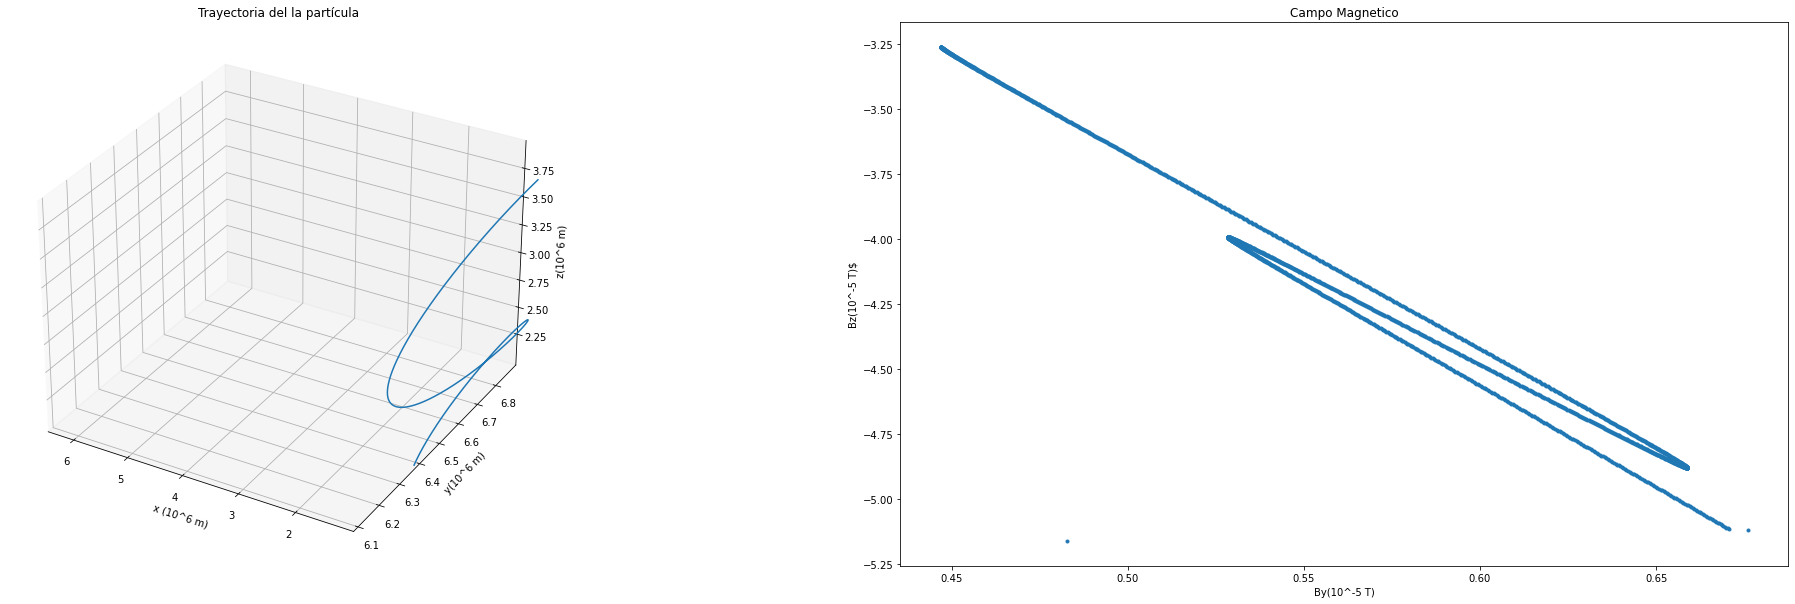

In [32]:
fig = plt.figure(figsize=(35,10))
ax0 = fig.add_subplot(121, projection='3d')
ax0.plot(R[:,0], R[:,1], R[:,2],)
ax0.set_xlabel('x (10^6 m)')
ax0.set_ylabel('y(10^6 m)')
ax0.set_zlabel('z(10^6 m)')
ax0.set_xlim(left=R_T)
ax0.set_title('Trayectoria del la partícula')

ax2=fig.add_subplot(122)
ax2.plot(BA[:,1],BA[:,2],'.')
ax2.set_xlabel('By(10^-5 T)')
ax2.set_ylabel('Bz(10^-5 T)$')
ax2.set_title('Campo Magnetico')

fig.savefig('SimuDipolo.png')